<a href="https://colab.research.google.com/github/Guh20/T-PICOS-DE-BIG-DATA-EM-PYTHON/blob/main/Atividade_Processual_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Pacote python para configurar as variaveis

import os

In [2]:
#import blibiote para converte a coluna para tipos numericos

import pandas as pd

In [3]:
#Instalando pacote FindSpark

!pip install findspark

In [4]:
#Instalaçao do java

!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [ ]:
#Versao do Java

! java --version


openjdk 11.0.22 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [5]:
#baixar  Apache SPARK


! wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

In [6]:
#Descompactar Apache SPARK

! tar -xf /content/spark-3.5.1-bin-hadoop3.tgz

In [7]:
#Excluir zip spark

!rm -rf /content/spark-3.5.1-bin-hadoop3.tgz

In [8]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [9]:
#Configuraçoes das variaveis

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ ['SPARK_HOME'] = "/content/spark-3.5.1-bin-hadoop3"

In [10]:
!pip install findspark

In [11]:
#Importando FindSpark

import findspark

findspark.init()

#Criar Sessao Spark

from pyspark.sql import SparkSession

#Sessao Spark

spark = SparkSession.builder.master("local[*]").appName('Atividade01').getOrCreate()

In [12]:
df = spark.read.csv("/content/prouni.csv")



In [13]:
#Ler os numeros de Linhas e Colunas

num_rows = df.count()
num_cols = len(df.columns)

#exibir os numreos de Linhas e Colunas

print(f"numeros de linhas: {num_rows}")
print(f"Numeros de colunas: {num_cols}")

numeros de linhas: 41448
Numeros de colunas: 20


In [14]:
#Exibir as Linhas do dataset

df.show(10)

+-----------+--------+-----------+--------------------+--------------------+-------------------+-------------------+---------------+-----------+-------------------+--------+----------------+--------------------+--------------------+---------+----------+-------------------+-------------------+------------------+------------------+
|        _c0|     _c1|        _c2|                 _c3|                 _c4|                _c5|                _c6|            _c7|        _c8|                _c9|    _c10|            _c11|                _c12|                _c13|     _c14|      _c15|               _c16|               _c17|              _c18|              _c19|
+-----------+--------+-----------+--------------------+--------------------+-------------------+-------------------+---------------+-----------+-------------------+--------+----------------+--------------------+--------------------+---------+----------+-------------------+-------------------+------------------+------------------+
|   

In [15]:
#Exibir Schema

df.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)



In [16]:
df.groupBy("_c2").count().show(10)


+-------+-----+
|    _c2|count|
+-------+-----+
| 2494.2|    1|
|2323.58|    1|
| 2269.8|    2|
|2078.98|    2|
| 1974.0|    1|
| 1496.0|    1|
| 1409.6|    1|
| 1350.9|    2|
|1341.21|    1|
| 1304.6|    3|
+-------+-----+
only showing top 10 rows



In [17]:
#Importar Bibliotecas

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

In [18]:
#Criando sessao spark

spark = SparkSession.builder.appName("listaprouni").getOrCreate()

In [19]:
#Dados defenidos

data = [
    ("Integral", 9999.99, "Medicina"),
    ("Noturno", 9836.4, "Enfermagem"),
    ("Integral", 9715.61, "Medicina"),
    ("Noturno", 9689.34, "Psicologia"),
    ("Integral", 9674.34, "Medicina"),
    ("Integral", 9650.0, "Medicina"),
    ("Integral", 9564.0, "Medicina"),
    ("Integral", 9350.0, "Medicina"),
    ("Integral", 9208.0, "Medicina"),
]

In [20]:
#Colunas defenidas


columns = ["turno", "mensalidade", "curso_busca"]

In [21]:
#Criando colunas agrupadas


df = spark.createDataFrame(data, columns)

In [22]:
#Exibindo as colunas


print("DataFrame original:")
df.show()

DataFrame original:
+--------+-----------+-----------+
|   turno|mensalidade|curso_busca|
+--------+-----------+-----------+
|Integral|    9999.99|   Medicina|
| Noturno|     9836.4| Enfermagem|
|Integral|    9715.61|   Medicina|
| Noturno|    9689.34| Psicologia|
|Integral|    9674.34|   Medicina|
|Integral|     9650.0|   Medicina|
|Integral|     9564.0|   Medicina|
|Integral|     9350.0|   Medicina|
|Integral|     9208.0|   Medicina|
+--------+-----------+-----------+



In [23]:
#Calcular a media da mensalidade


df_media = df.groupBy("turno").agg(avg("mensalidade").alias("media_mensalidade"))

In [24]:
#Exibir a media


print("Média da mensalidade por turno:")
df_media.show()

Média da mensalidade por turno:
+--------+-----------------+
|   turno|media_mensalidade|
+--------+-----------------+
|Integral|9594.562857142857|
| Noturno|9762.869999999999|
+--------+-----------------+



In [25]:
#Inicializando o SparkSession


spark = SparkSession.builder \
    .appName("Exemplo de Média") \
    .getOrCreate()

In [26]:
#Ler conjunto de dados


max_mensalidade = df.agg({"mensalidade": "max"}).collect()[0][0]

In [27]:
# Exibir valor máximo


print("O valor máximo da coluna mensalidade é:", max_mensalidade)

O valor máximo da coluna mensalidade é: 9999.99


In [28]:
#Pesquisando o valor minimo


min_mensalidade = df.agg({"mensalidade": "min"}).collect()[0][0]

In [29]:
#exibir valor minimo


print("O valor mínimo da coluna mensalidade é:", min_mensalidade)


O valor mínimo da coluna mensalidade é: 9208.0


In [30]:
#soma da coluna mensalidade


soma_mensalidade = df.agg({"mensalidade": "sum"}).collect()[0][0]

In [31]:
#Valor da soma


print("O somatório da coluna mensalidade é:", soma_mensalidade)

O somatório da coluna mensalidade é: 86687.68


In [32]:
#Criando o DataFrame

data = [
    ("Integral", 9999.99, ),
    ("Noturno", 9836.4, ),
    ("Integral", 9715.61, ),
    ("Noturno", 9689.34, ),
    ("Integral", 9674.34, ),
    ("Integral", 9650.0, ),
    ("Integral", 9564.0, ),
    ("Integral", 9350.0, ),
    ("Integral", 9208.0, ),
]
#Definindo o DataFrame
df = spark.createDataFrame(data, ["turno", "mensalidade"])

In [33]:
#Inicializando o SparkSession

spark = SparkSession.builder \
    .appName("Maior Inteiro") \
    .getOrCreate()

In [34]:
#importando as bibliotecas

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, ceil, floor
from pyspark.sql.functions import max as spark_max

In [35]:
# Extraindo os valores inteiros

df = df.withColumn("mensalidade_inteira", floor(col("mensalidade")))

In [36]:
# Procurando o maior valor inteiro


maior_inteiro = df.select(spark_max("mensalidade_inteira")).collect()[0][0]

In [37]:
#Resultado

print("O maior valor inteiro da mensalidade é:", maior_inteiro)

O maior valor inteiro da mensalidade é: 9999


In [58]:
#inicializando Spark

spark = SparkSession.builder \
    .appName("Ordenação Decrescente") \
    .getOrCreate()

In [45]:
#Criando dataframe


data = [
    ("Integral", 9999.99),
    ("Noturno", 9836.4),
    ("Integral", 9715.61),
    ("Noturno", 9689.34),
    ("Integral", 9674.34),
    ("Integral", 9650.0),
    ("Integral", 9564.0),
    ("Integral", 9350.0),
    ("Integral", 9208.0),
]

In [40]:
#Definindo o DataFrame


schema = ["turno", "mensalidade"]

In [41]:
#Criando Dataframe


df = spark.createDataFrame(data, schema)

In [56]:
#bibliotecas de ordenação decrescente.
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc

In [54]:
#Funçao da ordem decrescente


df_ordenado = df.orderBy(desc("mensalidade"))

In [55]:
#Exibir


df_ordenado.show()

+--------+-----------+
|   turno|mensalidade|
+--------+-----------+
|Integral|    9999.99|
| Noturno|     9836.4|
|Integral|    9715.61|
| Noturno|    9689.34|
|Integral|    9674.34|
|Integral|     9650.0|
|Integral|     9564.0|
|Integral|     9350.0|
|Integral|     9208.0|
+--------+-----------+



In [57]:
#Finalizando sessao


spark.stop()

In [59]:
# Inicializando o SparkSession
spark = SparkSession.builder \
    .appName("Exemplo de Gráfico com Ordenação Decrescente") \
    .getOrCreate()


In [70]:
# Importando as bibliotecas necessárias
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Criando os dados
data = [
    ("Bacharelado", "Integral", 9999.99),
    ("Bacharelado", "Noturno", 9836.4),
    ("Bacharelado", "Integral", 9715.61),
    ("Bacharelado", "Noturno", 9689.34),
    ("Bacharelado", "Integral", 9674.34),
    ("Bacharelado", "Integral", 9650.0),
    ("Bacharelado", "Integral", 9564.0),
    ("Bacharelado", "Integral", 9350.0),
    ("Bacharelado", "Integral", 9208.0),
]

In [61]:
# Definindo o esquema do DataFrame
schema = ["grau", "turno", "mensalidade"]


In [62]:
# Criando o DataFrame
df = spark.createDataFrame(data, schema)

In [71]:
# Adicionando colunas numéricas aleatórias
df = df.withColumn("nota_integral_ampla", (df["mensalidade"] * np.random.rand()))
df = df.withColumn("nota_integral_cotas", (df["mensalidade"] * np.random.rand()))
df = df.withColumn("outra_coluna", (df["mensalidade"] * np.random.rand()))

In [72]:
# Selecionando as colunas desejadas e ordenando o DataFrame em ordem decrescente pela coluna "mensalidade"
df_ordenado = df.select("mensalidade", "nota_integral_ampla", "nota_integral_cotas").orderBy(desc("mensalidade"))

In [73]:
# Convertendo o DataFrame para DataFrame do Pandas
df_pandas = df_ordenado.toPandas()


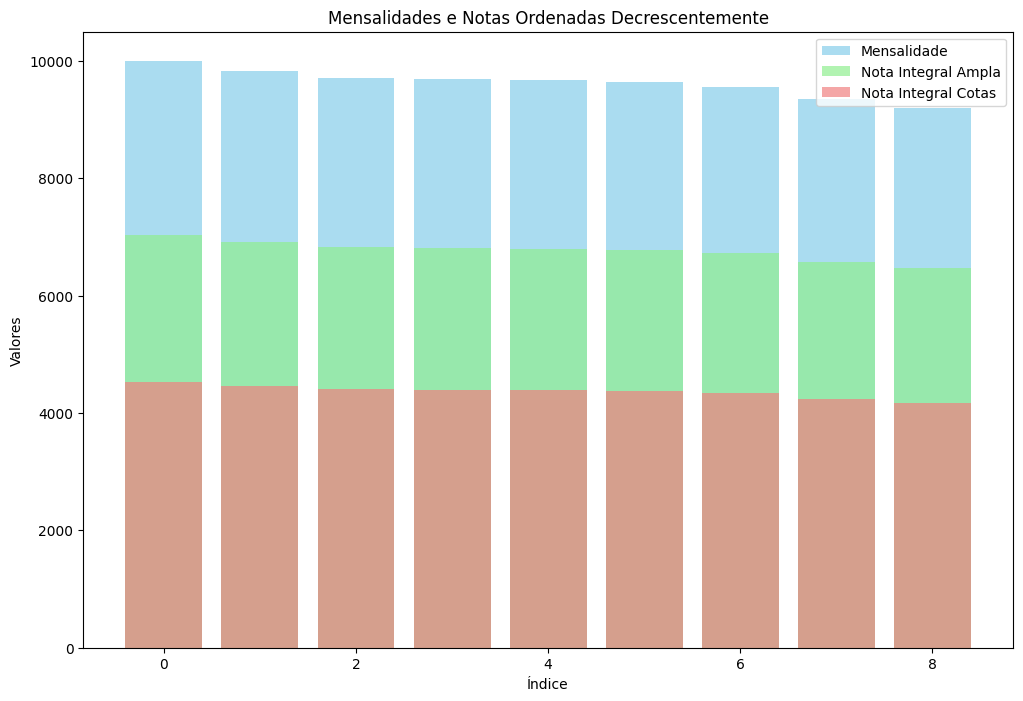

In [74]:
# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_pandas.index, df_pandas["mensalidade"], label='Mensalidade', color='skyblue', alpha=0.7)
plt.bar(df_pandas.index, df_pandas["nota_integral_ampla"], label='Nota Integral Ampla', color='lightgreen', alpha=0.7)
plt.bar(df_pandas.index, df_pandas["nota_integral_cotas"], label='Nota Integral Cotas', color='lightcoral', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Mensalidades e Notas Ordenadas Decrescentemente')
plt.legend()
plt.show()

In [75]:
# Finalizando a sessão Spark
spark.stop()